<center><h1>COVID-19 Vaccination Progress</h1></center>
<br>
<center><img src="https://c.files.bbci.co.uk/53A9/production/_115371412_gettyimages-1265248637.jpg" width=600></img></center>  

<br>

<h1 style='background:#26A2AB; border:0; color:black'><center>Introduction</center></h1> 

The data contains the following information:  

* **Country** - this is the country for which the vaccination information is provided;     
* **Country ISO Code** - ISO code for the country;   
* **Date**- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;   
* **Total number of vaccin ations** - this is the absolute number of total immunizations in the country;  
* **Total number of people vaccinated** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;  
* **Total number of people fully vaccinated** - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;  
* **Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;  
* **Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country;  
* **Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;  
* **Total number of people vaccinated per hundred** - ratio (in percent) between population immunized and total population up to the date in the country;  
* **Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunized and total population up to the date in the country;   
* **Number of vaccinations per day** - number of daily vaccination for that day and country;   
* **Daily vaccinations per million** -  ratio (in ppm) between vaccination number and total population for the current date in the country;    
* **Vaccines used in the country** - total number of vaccines used in the country (up to date);    
* **Source name** - source of the information (national authority, international organization, local organization etc.);   
* **Source website** - website of the source of information;    


<a id="0"></a>

### Content  

* <a href='#1'>Analysis preparation</a>  
* <a href='#2'>What vaccines are used in each country?</a>    
* <a href='#3'>Which vaccination scheme is used most?</a>    
* <a href='#4'>How many are vaccinated (total and as percent from population)?</a>    
* <a href='#5'>How the vaccination progressed</a>  



<a id="1"></a><h1 style='background:#26A2AB; border:0; color:black'><center>Analysis preparation</center></h1>


We initialize the Python packages we will use for data ingestion, preparation and visualization. We will use mostly Plotly for visualization.
Then we read the data file and aggregate the data on few fields (country, iso_code and vaccines - that is the vaccination scheme used in a certain country).

We will mainly look to:
* What vaccination schemes are used in various countries;  
* Total number of vaccinations and percent of vaccinations;  
* Daily vaccinations and daily vaccinations per million;
* Total people vaccinated and percent of people vaccinated;   

In the dataset is also information about the total number of people completely vaccinated (and percent of them).

We visualize the latest (maximum) values and as well for the variation in time of the above mentioned values.

***So we will be starting by importing the important libraries and packages of python which we are going to use *******

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

*# Use of the libararies mentioned above 

* **NumPy**- NumPy is a Python library used for working with arrays.It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* **pandas-** pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,built on top of the Python programming language.
* **Matplotlib.pyplot-** Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
* **seaborn -**Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* **plotly** -
    * Plotly has hover tool capabilities that allow us to detect any outliers or anomalies in a large number of data points.
    * It is visually attractive that can be accepted by a wide range of audiences.
    * It allows us for the endless customization of our graphs that makes our plot more meaningful and understandable for others
* **warning -** Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program. For example, one might want to issue a warning when a program uses an obsolete module.




In [ ]:
#Load up the dataset in dataframe data_df
data_df = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")
#Check the structure of our dataframe 
data_df.head()


Here the name of our dataframe is **data_df**\
Using pd.read_csv("location of dataset file") we ingested our data 
**read_csv()** is a function in **pandas** used for data ingestion

To check the first few rows of the data we use **dataframe.head()** function 



In [ ]:
# Save the number of rows columns as a tuple
rows_and_cols = data_df.shape
print("Brief Description Of Dataset country_vaccinations.csv Stored In DataFrame Object data_df:\n")
print('There are {} rows and {} columns in country_vaccinations.csv dataset.\n'.format(rows_and_cols[0], rows_and_cols[1]))

* **df.shape-** this method shows us the number of rows and col

In [ ]:
# Generate an overview of the DataFrame
covid_rec_country_vaccine_information = data_df.info()
print(covid_rec_country_vaccine_information)

* **df.info()-** this method give sthe generic information of the data

In [ ]:
# Check whether there are Nan values or not
print("\nBrief Description Whether DataFrame Object covid_rec_country_vaccine Consists Any NaN Values:\n", data_df.isna().sum(), sep="")

To check if there is NA values in our data we can se **.isna()** function

Here we can see the variables showing 0 will depict that it has no NA values
Country, Iso_code, date, vaccines, source_name and source_website cannot have NA value 

In [ ]:
country_vaccine = data_df.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()
country_vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']

Here we are firstly dividing our dataset into groups and then we are reseting their index and running analytics based on each group aand we are mining the results into this single dataframe 
This is called **split, Apply and combine**

* **groupby() -** -Pandas dataframe.groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.

So here we are grouping on the basis of three variables country, iso_code and vaccines

* **reset_index()** - function resets and provides the new index to the grouped by dataframe and makes them a proper dataframe structure

* **country_vaccine.columns-** Here we are mentioning the column names of the grouped dartaframe 

<a id="2"></a><h1 style='background:#26A2AB; border:0; color:black'><center>What vaccines are used in each country?</center></h1>

Press **Output** button to see a list of countries where each vaccine is used. 


In [ ]:
vaccines = country_vaccine.Vaccines.unique()
for v in vaccines:
    countries = country_vaccine.loc[country_vaccine.Vaccines==v, 'Country'].values
    print(f"Vaccines: {v}: \nCountries: {list(countries)}\n")

* **unique()function** - is going to tell us the name of the unique vaccines and the country associated with it 
* **.values** - this is going to find the values associated with it 
* Here we can see different vaccines and the countries which have them 

In [ ]:
fig = px.choropleth(locations=country_vaccine['Country'], 
                    locationmode="country names",
                    color=country_vaccine['Vaccines'],
                    title="Countries using each vaccine (different colors for each vaccine)",
                    height = 800
                   )
fig.update_layout({'legend_orientation':'v'})
fig.update_layout({'legend_title':'Vaccine scheme'})
fig.show()

* **px.choropleth() -** A Choropleth Map is a map composed of colored polygons in plotly library. It is used to represent spatial variations of a quantity.
The different colors here represent the different vaccines across different parts of the world. It gives us a description of different vaccines used in different parts of the world .

* **legend_orientation:**  here is mentioned as 'v' as in vertical column representing the vaccines on the right we can even change to 'h'- horizontal

* **fig.show()** -shows us the figure or plot 

<a id="3"></a><h1 style='background:#26A2AB; border:0; color:black'><center>Which vaccination scheme is used most?</center></h1>

## Overall

Let's look first to the vaccination scheme used overall (not splitted per countries).

In [ ]:
vaccine = data_df.groupby(["vaccines"])['total_vaccinations','total_vaccinations_per_hundred',
                                       'daily_vaccinations','daily_vaccinations_per_million'].max().reset_index()
vaccine.columns = ["Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million"]
def draw_trace_bar_vaccine(data, feature, title, xlab, ylab,color='Blue'):
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data['Vaccines'],
            y = data[feature],
            marker=dict(color=color),
            text=data['Vaccines']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='black'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest',
              height = 800
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

Here we are visualizing the overall vaccination scheme, so we are creating another dataset vaccine and using groupby() fuynction asgain grouping the set as per the need 
Then defining a function which draws the trace bar for the vaccination to present our overall vaccination scheme. with the dataset as vaccine and the feature as total vaccinations and ascending=False shows the order they will be sorted will be in descending order
* **data.sort_values() -** Pandas sort_values() function sorts a data frame in Ascending or Descending order of passed Column. It’s different than the sorted Python function since it cannot sort a data frame and particular column cannot be selected.

* **go.bar() -** Horizontal Bar Chart with go.Bar
setting the x axis = vaccines variable and y axis = total vaccinations 
so we are now returning a dictionary object in marker here using dict() 

* **fig = dict()** - At a low level, figures can be represented as dictionaries and displayed using functions from the plotly.io module.



In [ ]:
draw_trace_bar_vaccine(vaccine, 'Total vaccinations', 'Total per vaccine scheme', 'Vaccine', 'Vaccination total', "darkmagenta" )

Some countries are using a mixed vaccination scheme (they are using more than one vaccine).

The mapping is as following:
* Moderna, Pfizer/BioNTech - USA;  
* CNBG, Sinovac - China;  
* Oxford/AstraZeneca, Pfizer/BioNTech', 'Pfizer/BioNTech - UK;  
* Pfizer/BioNTech - mostly EU;  
* Pfizer/BioNTech, Sinopharm - UAE;  
* Sinovac - Turkey;   
* Covaxin, Covishield - India;  



## Per countries

To see the vaccination scheme distribution per countries, we will use treemap representations. 

We look to the total vaccinations, to daily vaccinations values as well as total people vaccinated.

<font color="red">Note</font>: click on a treemap item to navigate down the tree structure and expand the current branch.

In [ ]:
fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'Total vaccinations',
                title="Total vaccinations per country, grouped by vaccine scheme")
fig.show()

Here we can see how for each country there are different vaccine schemes for differnet country 

In [ ]:
fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'Daily vaccinations',
                title="Daily vaccinations per country, grouped by vaccine scheme")
fig.show()

This shows us the daily vaccinations stock in every country 

In [ ]:
fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'People vaccinated',
                title="People vaccinated per country, grouped by vaccine scheme")
fig.show()

This shows us people who are vaccinated with the first dose according to the countries and by which vaccine they were immunized

<a id="4"></a><h1 style='background:#26A2AB; border:0; color:black'><center>How many are vaccinated (total and as percent from population)?</center></h1>

Let's look now to the countries statistics, irrespective to the vaccine scheme. We will look to the top of the countries by:

- Total number of vaccinations;  
- Percent of vaccinations from entire population;  
- Daily number of vaccinations;  
- Daily number of vaccination per million population;  
- People vaccinated;  
- Percent of vaccinated people from entire population.

In [ ]:
def draw_trace_bar(data, feature, title, xlab, ylab,color='Blue'):
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data['Country'],
            y = data[feature],
            marker=dict(color=color),
            text=data['Country']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='black'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')



In [ ]:
draw_trace_bar(country_vaccine, 'Total vaccinations', 'Vaccination total per country', 'Country', 'Vaccination total', "Darkgreen" )

Here we can see for all the countries irrespective of the vaccine scheme what is are the total number of vaccines

on the x axis are mentioned the countris 

on the y axis are total number of vaccinations available in countries on x axis 

In [ ]:
draw_trace_bar(country_vaccine, 'Percent', 'Vaccination percent per country', 'Country', 'Vaccination percent' )

This shows us the total vaccines available per hundred people in every country 

**Note :** Here variable percent represents original data_df variable which we named total_vaccinations_per_hundred in country_vaccine dataframe

Here Gibraltar has abundant of vaccines per hundred people while Democratic Public of Congo has the scarcity of vaccines as compared to its population 

In [ ]:
draw_trace_bar(country_vaccine, 'Daily vaccinations', 'Daily vaccinations per country', 'Country', 'Daily vaccinations', "red" )

This shows daily vaccination stock available per country

Clearly China has the largest number of stocks of daily vaccines 

Following china is United States and so on ...

In [ ]:
draw_trace_bar(country_vaccine, 'Daily vaccinations per million', 'Daily vaccinations per million per country', 'Country',\
               'Daily vaccinations per million', "magenta" )

This shows daily vaccination stock per million people available 

Bhutan has the largest stock as comp 1 million pop


In [ ]:
draw_trace_bar(country_vaccine, 'People vaccinated', 'People vaccinated per country', 'Country',\
               'People vaccinated', "lightblue" )

This shows people vaccinated per country= people from different countries who got their first dose 

in unites states more than 100 Mpeople have got their first shot of vaccine 

In [ ]:
draw_trace_bar(country_vaccine, 'People vaccinated per hundred', 'People vaccinated per hundred per country', 'Country',\
               'People vaccinated per hundred', "orange" )

Here we can see that in Gibraltor vaccines are available in abundance per 100 person whereas in Saint Vincent and the grenadines there are a scarcity of vaccines per 100 people 

Graph from left to right shows the decreasing order od availabily of vaccines in different countries per 100 people 

Now We will use Scatter Plots to see how we can use them to visualize our data 

In [ ]:
def plot_custom_scatter(df, x, y, size, color, hover_name, title):
    fig = px.scatter(df, x=x, y=y, size=size, color=color,
               hover_name=hover_name, size_max=80, title = title)
    fig.update_layout({'legend_orientation':'h'})
    fig.update_layout(legend=dict(yanchor="top", y=-0.2))
    fig.update_layout({'legend_title':'Vaccine scheme'})
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='grey')
    fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='grey')
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.show()    

* **px.scatter(dataframe,x,x,size,color)** is used to plot a scatter plot 

Here we are making a function plot_custom_scatter which takes in the variables 

* df= dataframe
* x= represnts x axis variable 
* y= represnts y axis variable
* size= represents by what factor we are determining size of our scatter plots 
* color = by what factors are we defining the color of scatter plot for better viz
* hover_name= when we scroll over to the scatter plots or hover over whic variable should show up the information
* title = name of title


In [ ]:
plot_custom_scatter(country_vaccine, x="Total vaccinations", y="Percent", size="Total vaccinations", color="Vaccines",
           hover_name="Country", title = "Vaccinations (Percent vs. total), grouped per country and vaccines")

* Here Using such graphs its really easy to compare data using hover ,also one of a great functionality of scatter graphs like this with a legend is that if we double click on one of the vaccinews sit shows us data related to that on the graph 

* here we can see we have total vaccines on our x -axis and percent of vaccinations (vaccinations available per 100 people in a country ) on y axis 

* if a circle shows vaccines more than 100 that means vaccines are avilable in abundance as compared to the people there 


In [ ]:
plot_custom_scatter(country_vaccine, x="Total vaccinations", y="Daily vaccinations", size="Total vaccinations", color="Vaccines",
           hover_name="Country", title = "Vaccinations (Total vs. Daily) grouped per country and vaccines")

* here we are visualizing the **Daily vaccinations stock available( Y-axis )** in different countries on an average everyday as compared to the **total vaccinations(X-axis)** available at the last entry date in our dataset 

In [ ]:
plot_custom_scatter(country_vaccine, x="Percent", y="Daily vaccinations per million", size="Total vaccinations", color="Vaccines",
           hover_name="Country", title = "Vaccinations (Daily / million vs. Percent) grouped per country and vaccines")

Here we are viz **daily Vaccinations per 1 million people(Y- axis)** in different countries VS the **percent (original variable - total vaccines per hundred people)[X -axis]**

Now let's dive more into choropleth and build **world maps** which gives a beautiful representaion of our data and shows us different aspects of it from which we can build insights on it

In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['Total vaccinations'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total vaccinations',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total vaccinations per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

* Here our graph is showing us that **total vaccination spread in different parts of the world **
* United States , North West part of Canaada and some part of china . If we check in our legend on the left it shows how in these countries vaccinatuions have exceeded even **250 Million** which s a good thing .
* Using **plotly and iplot** building chropleth maps can present our data super clear and in a beautiful way . 

In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['Percent'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Percent',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total vaccinations per hundred per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

* Here we can see how Total vaccination per hundred people are available in different countries
* In Israel 121 vaccines are avialble and in united Arab Emirates 109 vaccines are available per 100 people shown in greenish blue 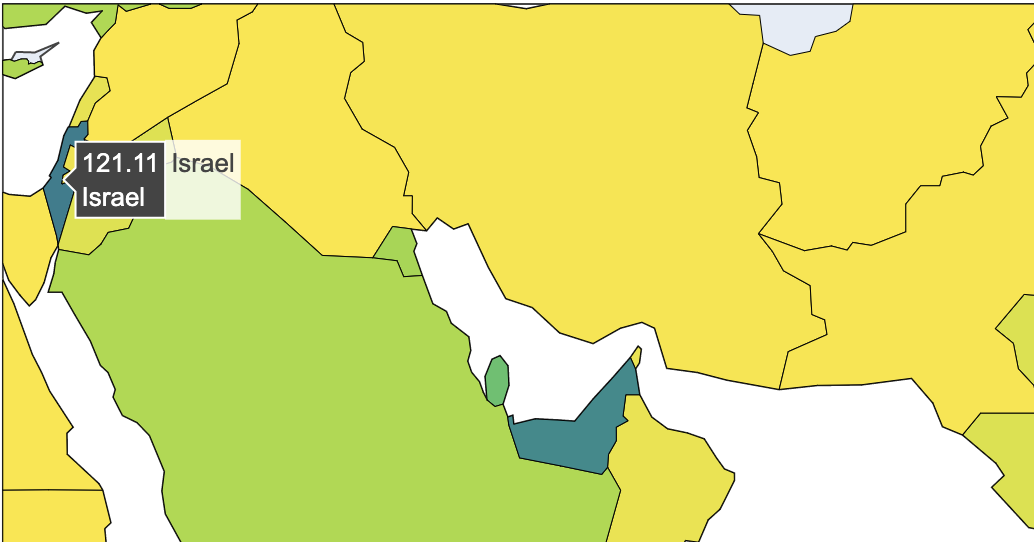
* we can see how in Saudiarabia very less vaccines are available per 100 people 
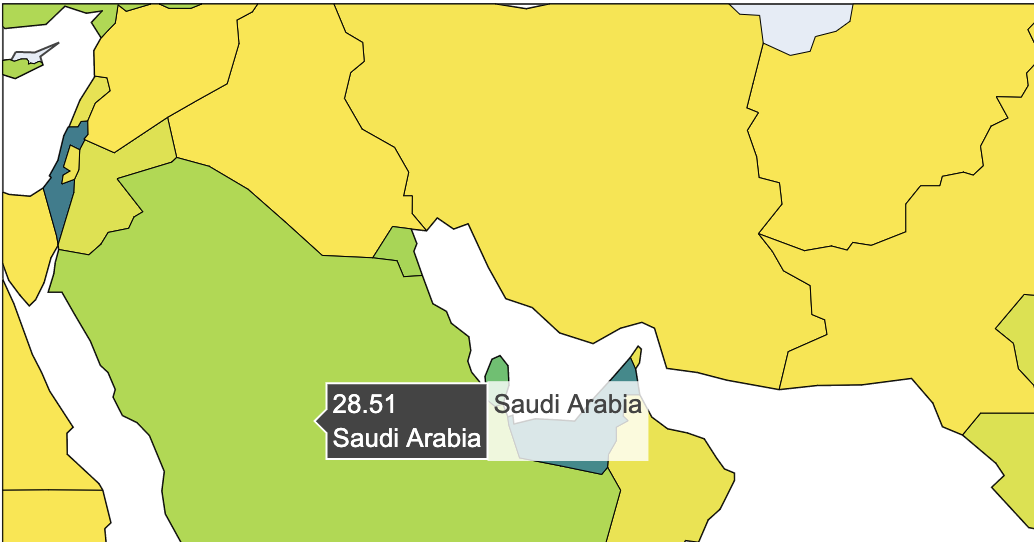



In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['Daily vaccinations'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Daily vaccinations',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Daily vaccinations per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

* This plot shows Daily vaccinatiion doses avilable per country 
* We can see here in India 3.6 M doses of vaccines are at stock daily 
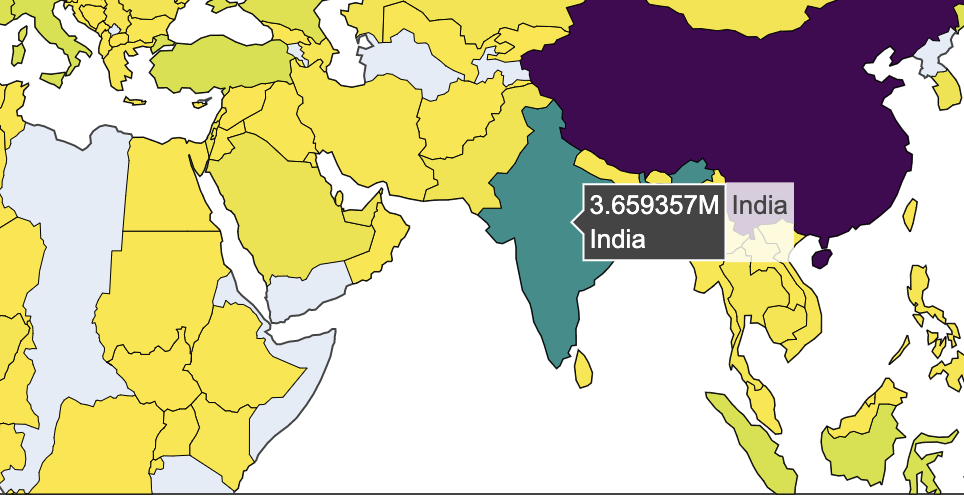
in China 7.2 Million
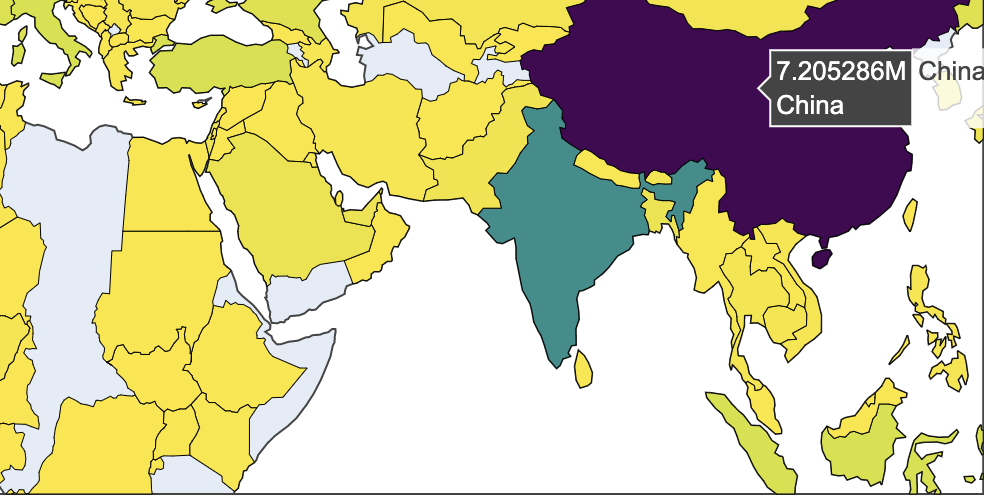

In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['Daily vaccinations per million'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Daily vaccinations per million',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Daily vaccinations per million per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

* Similarly this shows daily vaccinations per million per country 


In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['People vaccinated'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'People vaccinated',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'People vaccinated per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['People vaccinated per hundred'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'People vaccinated per hundred',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'People vaccinated per hundred per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

This shows how many people are vaccinated with one dose per hundred people in a country 


<a id="5"></a><h1 style='background:#26A2AB; border:0; color:black'><center>How the vaccination progressed</center></h1>

Let's look to the way the vaccination progressed.

We will look to the values of total vaccination and daily vaccination.

In [ ]:
country_vaccine_time = data_df[["country", "vaccines", "date", 'total_vaccinations', 
                                'total_vaccinations_per_hundred',  'people_vaccinated','people_vaccinated_per_hundred',
                               'daily_vaccinations','daily_vaccinations_per_million', 
                                'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                               ]].dropna()
country_vaccine_time.columns = ["Country", "Vaccines", "Date", 'Total vaccinations', 'Percent', 'People vaccinated', 'People percent',
                               "Daily vaccinations", "Daily vaccinations per million", 
                                'People fully vaccinated', 'People fully vaccinated percent']

In [ ]:
countries = ['Austria', 'Belgium', 'Bulgaria','Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
             'Greece', 'Hungary', 'Ireland', 'Israel', 'Italy', 'Latvia','Lithuania', 'Luxembourg', 'Malta',
             'Netherlands', 'Norway','Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Spain', 'Sweden',
             'United Kingdom', 'United States', 'China']

In [ ]:
def plot_time_variation_countries_group(data_df, feature, title, countries):
    data = []
    for country in countries:
        df = data_df.loc[data_df.Country==country]
        trace = go.Scatter(
            x = df['Date'],y = df[feature],
            name=country,
            mode = "markers+lines",
            marker_line_width = 1,
            marker_size = 8,
            marker_symbol = 'circle',
            text=df['Country'])
        data.append(trace)
    layout = dict(title = title,
          xaxis = dict(title = 'Date', showticklabels=True,zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=2, linecolor='black', mirror=True,
                       tickfont=dict(size=10,color='darkblue'),), 
          yaxis = dict(title = feature, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=2, linecolor='black', mirror=True, type="log"),
                       plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
         hovermode = 'x', 
         height=800
         )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='all_countries')

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'Percent', 'Total vaccination percent evolution (selected countries, log scale)', countries)

Look at this beautiful graph this is also known as Evolution graph 

* Shows how the evolution of vaccine for different variables took place with time 
* The above graph shows total vaccination per hundred people and how it exoluted 

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'Total vaccinations', 'Total vaccination evolution (selected countries, log scale)', countries)

* This shows the total vaccines available in different coiuntries at different time periods and did they had increase in the supply or they were in shortage of vaccines 

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'People percent', 'People vaccinated percent evolution (selected countries, log scale)', countries)

* Shows how many people got vaccinated with one dose per 100 people at different times in different countries 

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'People vaccinated', 'People vaccinated evolution (selected countries, log scale)', countries)

* How many people got their first dose as per their countries at different time 

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'Daily vaccinations', 'Daily vaccinations evolution (selected countries, log scale)', countries)

* Stocks of daily vaccines over the time span for different countries

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'Daily vaccinations per million', 'Daily vaccinations per million evolution (selected countries, log scale)', countries)

* This shows the daily vaccinations stock evolution per million people during different phases of time 

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'People fully vaccinated percent', 'People fully vaccinated percent evolution (selected countries, log scale)', countries)

* This shows how many people are fully vaccinated per hundred people in different countries during different phases of time 

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'People fully vaccinated', 'People fully vaccinated evolution (selected countries, log scale)', countries)

* Shows how many people are fully vaccinated in different countries during different periods of time 